In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

# Business Understanding

Your company is expanding in to new industries to diversify its portfolio. Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises, but do not know anything about the potential risks of aircraft. You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor. You must then translate your findings into actionable insights that the head of the new aviation division can use to help decide which aircraft to purchase.

# Data Understanding

A dataset from the National Transportation Safety Board that includes aviation accident data from 1962 to 2023 about civil aviation accidents and selected incidents in the United States and international waters. Every flight has an ID number to reference to and data that includes information such as Make, Model, weather, and purpose of flight.

# Data Preparation

In [677]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [678]:
df = pd.read_csv('data/Aviation_Data.csv', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [679]:
# Checking columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [680]:
df.shape

(90348, 31)

Cleaning up Dataset by time and types of aircraft and dropping fatality nans

In [681]:
# Changing Event Date Format and taking out information within the past 23 years
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 2000]

In [682]:
#Dropping NaN values in column Total Fatal Injuries
df['Total.Fatal.Injuries'].dropna(inplace=True)

In [683]:
# Checking how many aircrafts are in dataset
df['Aircraft.Category'].value_counts()

Airplane             24164
Helicopter            3112
Glider                 455
Balloon                201
Weight-Shift           161
Gyrocraft              158
Powered Parachute       91
Ultralight              29
Unknown                 13
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: Aircraft.Category, dtype: int64

In [684]:
#Taking out data that only includes Airplanes
df_filtered = df[df['Aircraft.Category'] == 'Airplane']

## Cleaning Make

In [685]:
# New copy to work with
make_df = df_filtered.copy()

In [686]:
# Checking first 10 values
make_df['Make'].head(10)

47682              Boeing
47743               Myers
47779    Airbus Industrie
47845              Boeing
47864              Cessna
47869              Cessna
47870             Douglas
47876               Ayres
47911              Boeing
47942              Boeing
Name: Make, dtype: object

In [687]:
# Checking the different values of Makes
make_df['Make'].value_counts()

CESSNA                    4867
PIPER                     2805
Cessna                    2225
Piper                     1148
BOEING                    1037
                          ... 
Phantom Sport Airplane       1
MARCONI FRED I JR            1
Qac                          1
RATCLIFFE JOHN A             1
Marvin A. Smith              1
Name: Make, Length: 3738, dtype: int64

In [688]:
# Checking for NaNs
make_df['Make'].isna().sum()

3

In [689]:
# Drop NaNs
make_df['Make'].dropna(inplace=True)

In [690]:
# Reformatting some values to accurately group them together
name_changes = {'CESSNA': 'Cessna', 'PIPER': 'Piper', 'BEECH': 'Beech','CIRRUS DESIGN CORP':'Cirrus Design Corp',
 'BOEING': 'Boeing','MOONEY': 'Mooney','BELLANCA':'Bellanca','AERONCA':'Aeronca',
'EMBRAER':'Embraer','MAULE':'Maule','AIRBUS':'Airbus','AIR TRACTOR INC':'Air Tractor'}

make_df['Make'] = make_df['Make'].replace(name_changes)

In [691]:
# Checking changes of value counts
make_df['Make'].value_counts()

Cessna                       7092
Piper                        3953
Beech                        1409
Boeing                       1223
Mooney                        361
                             ... 
MICHAEL J ROBBINS               1
KAYLOR J E/STRAHLMANN R L       1
Phantom Sport Airplane          1
MARCONI FRED I JR               1
Marvin A. Smith                 1
Name: Make, Length: 3726, dtype: int64

In [692]:
# A lot of incidents with just one count
make_counts = make_df['Make'].value_counts()

In [693]:
# Filtering out Values less than 100 accidents
valid_make = make_df['Make'].isin(make_counts[make_counts >= 100].index)

In [694]:
# Creating new variable for our filtered Make column
filtered_make = make_df[valid_make]

In [695]:
#Checking the values we have after filtering
filtered_make['Make'].value_counts()

Cessna                7092
Piper                 3953
Beech                 1409
Boeing                1223
Mooney                 361
Air Tractor            334
Airbus                 245
Cirrus Design Corp     220
Bellanca               219
Maule                  214
Aeronca                200
Embraer                149
Name: Make, dtype: int64

## Cleaning Models

In [696]:
# New copy to work with
model_df = df_filtered.copy()

In [697]:
# Looking at first 10 values
model_df['Model'].head(10)

47682      737-3K2
47743          Q-2
47779        A 310
47845    B 727-100
47864         208B
47869         182M
47870     DC-8-71F
47876          NaN
47911     B737-400
47942      737-300
Name: Model, dtype: object

In [698]:
# Checking the counts of each value
model_df['Model'].value_counts()

172             770
737             403
152             314
182             300
172S            278
               ... 
FP 202 KOALA      1
172 S             1
ALLEGRO 20        1
B744              1
Lear 23           1
Name: Model, Length: 4986, dtype: int64

In [699]:
#checking for NaNs
model_df['Model'].isna().sum()

18

In [700]:
# Dropping NaNs since there are only 18
model_df['Model'].dropna(inplace=True)

In [701]:
# Assigning a variable to value counts
model_counts = model_df['Model'].value_counts()

In [702]:
# Assigning varibable to models that have more than 100 accidents
valid_model = model_counts[(model_counts >= 100)].index

In [703]:
# Filtering out the models that have less than 100 accidents
filtered_model = model_df[model_df['Model'].isin(valid_model)]

In [704]:
# Checking value counts after filtering
filtered_model['Model'].value_counts()

172          770
737          403
152          314
182          300
172S         278
PA28         273
SR22         265
172N         248
180          213
A36          187
172M         179
150          177
PA-18-150    175
PA-28-140    164
172P         142
140          117
172R         110
170B         106
PA-28-161    106
PA-28-180    103
Name: Model, dtype: int64

## Engine Type Cleaning

In [705]:
# New Copy to work with
engine_type_df = df_filtered.copy()

In [706]:
# Checking the first ten values
engine_type_df['Engine.Type'].head(10)

47682          Unknown
47743    Reciprocating
47779          Unknown
47845          Unknown
47864       Turbo Prop
47869    Reciprocating
47870        Turbo Fan
47876              NaN
47911          Unknown
47942        Turbo Fan
Name: Engine.Type, dtype: object

In [707]:
# Checking the counts of each value
engine_type_df['Engine.Type'].value_counts()

Reciprocating      17569
Turbo Prop          1257
Turbo Fan            905
Turbo Jet            133
Unknown               48
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

In [708]:
# Have 48 Unknowns going to leave them out
engine_type_df = engine_type_df[engine_type_df['Engine.Type'] != 'Unknown']

In [709]:
# Checking for NaNs
engine_type_df['Engine.Type'].hasnans

True

In [710]:
#Looking for amount of NaNs
engine_type_df['Engine.Type'].isna().sum()

4223

In [711]:
# Dropping NaNs 
engine_type_df['Engine.Type'].dropna(inplace=True)

In [712]:
engine_type_df['Engine.Type'].value_counts()

Reciprocating      17569
Turbo Prop          1257
Turbo Fan            905
Turbo Jet            133
Geared Turbofan       12
Turbo Shaft           11
Electric               5
UNK                    1
Name: Engine.Type, dtype: int64

# Exploratory Data Analysis

### Exploring Make

In [713]:
# Creating a df with just columns Make and Total Fatal injuries
make_and_fatalities = filtered_make[['Make','Total.Fatal.Injuries']]
make_grouped = make_and_fatalities.groupby('Make')['Total.Fatal.Injuries'].sum().reset_index()
make_grouped

,Make,Total.Fatal.Injuries
0,Aeronca,26.0
1,Air Tractor,53.0
2,Airbus,1316.0
3,Beech,981.0
4,Bellanca,41.0
5,Boeing,2658.0
6,Cessna,2444.0
7,Cirrus Design Corp,124.0
8,Embraer,317.0
9,Maule,32.0


In [714]:
# Creating a df with Make and total Accidents
filtered_make_counts = filtered_make['Make'].value_counts().reset_index()
filtered_make_counts.columns = ['Make','Total Accidents']
filtered_make_counts

,Make,Total Accidents
0,Cessna,7092
1,Piper,3953
2,Beech,1409
3,Boeing,1223
4,Mooney,361
5,Air Tractor,334
6,Airbus,245
7,Cirrus Design Corp,220
8,Bellanca,219
9,Maule,214


In [715]:
# Merging the two dataframes that we just made and creating a 'Safety Ratio' Column
make_result = pd.merge(make_grouped, filtered_make_counts, on='Make', how='left', suffixes=('_grouped', ''))
make_result = make_result[['Make','Total Accidents','Total.Fatal.Injuries']]
make_result['Safety Ratio'] = make_result['Total.Fatal.Injuries'] / make_result['Total Accidents']
make_result

,Make,Total Accidents,Total.Fatal.Injuries,Safety Ratio
0,Aeronca,200,26.0,0.130000
1,Air Tractor,334,53.0,0.158683
2,Airbus,245,1316.0,5.371429
3,Beech,1409,981.0,0.696238
4,Bellanca,219,41.0,0.187215
5,Boeing,1223,2658.0,2.173344
6,Cessna,7092,2444.0,0.344614
7,Cirrus Design Corp,220,124.0,0.563636
8,Embraer,149,317.0,2.127517
9,Maule,214,32.0,0.149533


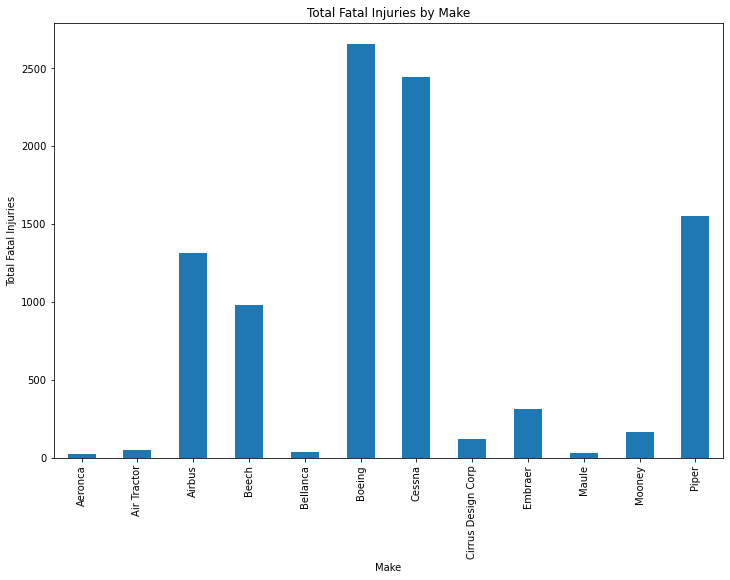

In [716]:
make_result.plot(kind='bar', x='Make', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Make')
plt.show()

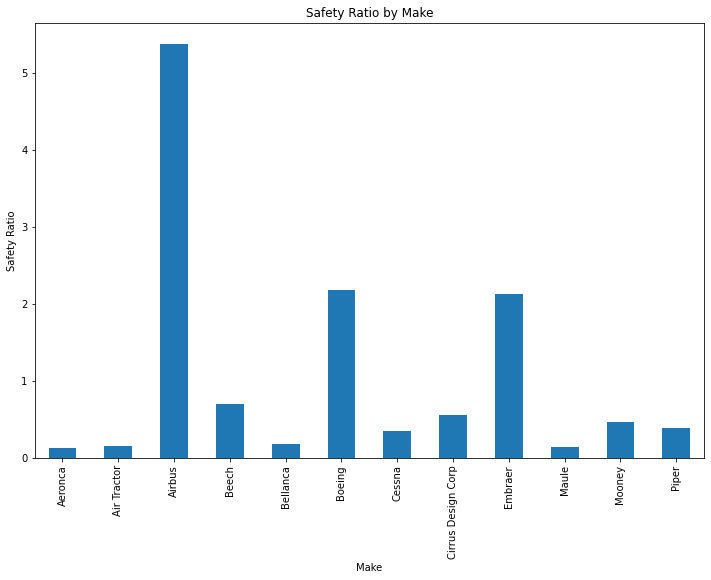

In [717]:
make_result.plot(kind='bar', x='Make', y='Safety Ratio', legend=False, figsize=(12, 8))
plt.xlabel('Make')
plt.ylabel('Safety Ratio')
plt.title('Safety Ratio by Make')
plt.show()

### Exploring Models

In [718]:
# Creating a df with just columns Model and Total Fatal injuries
model_and_fatalities = filtered_model[['Model','Total.Fatal.Injuries']]
model_grouped = model_and_fatalities.groupby('Model')['Total.Fatal.Injuries'].sum().reset_index()

In [719]:
# Creating a df with Model and total Accidents
filtered_model_counts = filtered_model['Model'].value_counts().reset_index()
filtered_model_counts.columns = ['Model','Total Accidents']

In [720]:
# Merging the two dataframes that we just made and creating a 'Safety Ratio' Column
model_result = pd.merge(model_grouped, filtered_model_counts, on='Model', how='left', suffixes=('', ''))
model_result = model_result[['Model','Total Accidents','Total.Fatal.Injuries']]
model_result['Safety Ratio'] = model_result['Total.Fatal.Injuries'] / model_result['Total Accidents']
model_result

,Model,Total Accidents,Total.Fatal.Injuries,Safety Ratio
0,140,117,17.0,0.145299
1,150,177,59.0,0.333333
2,152,314,47.0,0.149682
3,170B,106,10.0,0.094340
4,172,770,215.0,0.279221
5,172M,179,44.0,0.245810
6,172N,248,70.0,0.282258
7,172P,142,11.0,0.077465
8,172R,110,19.0,0.172727
9,172S,278,50.0,0.179856


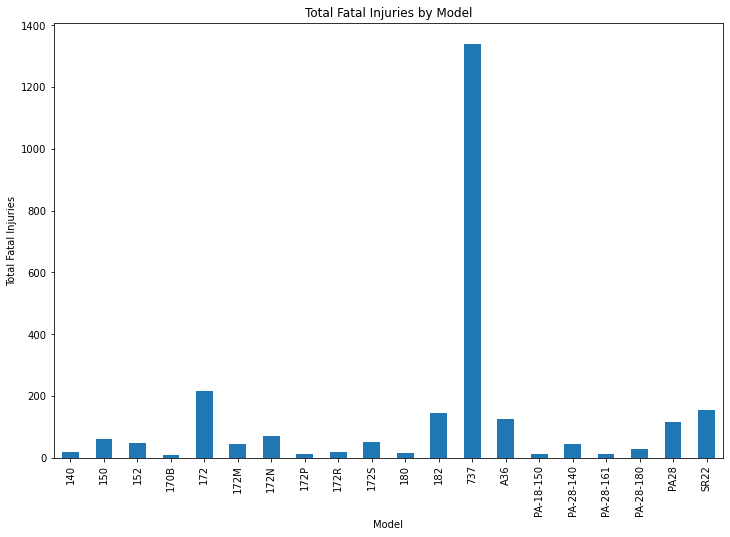

In [721]:
model_result.plot(kind='bar', x='Model', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Model')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Model')
plt.show()

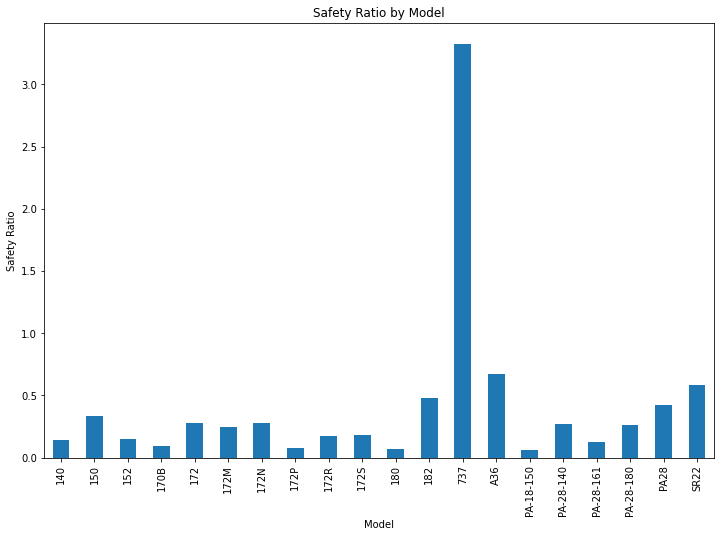

In [722]:
model_result.plot(kind='bar', x='Model', y='Safety Ratio', legend=False, figsize=(12, 8))
plt.xlabel('Model')
plt.ylabel('Safety Ratio')
plt.title('Safety Ratio by Model')
plt.show()

### Exploring Engine Types

In [723]:
# Creating a df with just columns Engine Types and Total Fatal injuries
engine_type_and_fatalities = engine_type_df[['Engine.Type','Total.Fatal.Injuries']]
engine_type_grouped = engine_type_and_fatalities.groupby('Engine.Type')['Total.Fatal.Injuries'].sum().reset_index()

In [724]:
# Creating a df with Engine Types and total Accidents
filtered_engine_counts = engine_type_df['Engine.Type'].value_counts().reset_index()
filtered_engine_counts.columns = ['Engine.Type','Total Accidents']

In [725]:
# Merging the two dataframes that we just made and creating a 'Safety Ratio' Column
engine_type_result = pd.merge(filtered_engine_counts, engine_type_grouped, on='Engine.Type')
engine_type_result['Safety Ratio'] = engine_type_result['Total.Fatal.Injuries'] / engine_type_result['Total Accidents']
engine_type_result

,Engine.Type,Total Accidents,Total.Fatal.Injuries,Safety Ratio
0,Reciprocating,17569,4796.0,0.272981
1,Turbo Prop,1257,795.0,0.632458
2,Turbo Fan,905,894.0,0.987845
3,Turbo Jet,133,65.0,0.488722
4,Geared Turbofan,12,0.0,0.000000
5,Turbo Shaft,11,3.0,0.272727
6,Electric,5,0.0,0.000000
7,UNK,1,0.0,0.000000


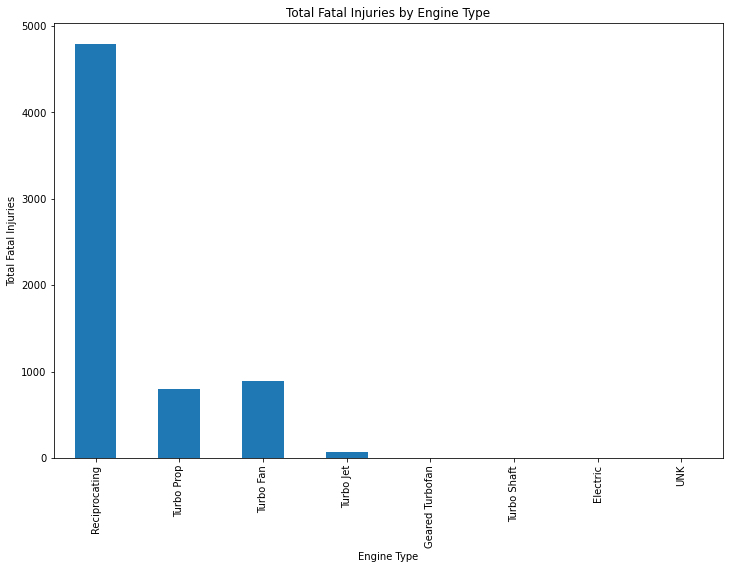

In [726]:
engine_type_result.plot(kind='bar', x='Engine.Type', y='Total.Fatal.Injuries', legend=False, figsize=(12, 8))
plt.xlabel('Engine Type')
plt.ylabel('Total Fatal Injuries')
plt.title('Total Fatal Injuries by Engine Type')
plt.show()

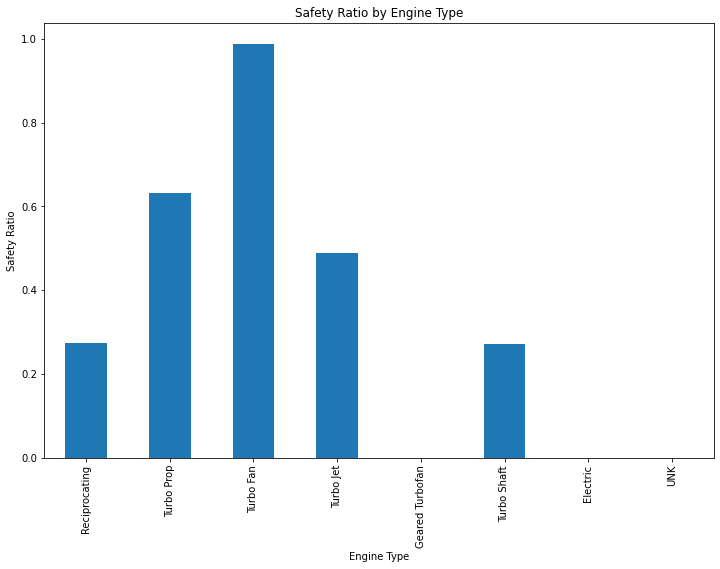

In [727]:
engine_type_result.plot(kind='bar', x='Engine.Type', y='Safety Ratio', legend=False, figsize=(12, 8))
plt.xlabel('Engine Type')
plt.ylabel('Safety Ratio')
plt.title('Safety Ratio by Engine Type')
plt.show()

# Conclusion

## Limitations

## Recommendations

## Next Steps